<a href="https://colab.research.google.com/github/jalva53/fire-emblem-work-lol/blob/main/FEH_stats_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [54]:
df = pd.read_csv("FEH Unit List.csv")
df

,ID,Unit Name,Character,Backpack,Unit Obtained,Special Type,Theme,Rarity,Release Date,Refine Date,...,Tier.1,C,Tier.2,X,HP,ATK,SPD,DEF,RES,BST
0,1,Alfonse,Alfonse,NaN,Story,NaN,NaN,Story,2017-02-02,2018-08-08,...,NaN,Spur Atk,3.0,NaN,43,35,25,32,22,157
1,2,Sharena,Sharena,NaN,Story,NaN,NaN,Story,2017-02-02,2018-08-08,...,NaN,Fortify Def,3.0,NaN,43,32,32,29,22,158
2,3,Anna,Anna,NaN,Story,NaN,NaN,Story,2017-02-02,2018-08-08,...,3.0,Spur Res,3.0,NaN,41,29,38,22,28,158
3,4,Marth,Marth,NaN,Normal Pool,NaN,NaN,3★/4★,2017-02-02,2018-02-08,...,3.0,Spur Spd,3.0,NaN,41,31,34,29,23,158
4,5,Ogma,Ogma,NaN,Normal Pool,NaN,NaN,3★/4★,2017-02-02,2018-12-10,...,NaN,Spur Atk,3.0,NaN,47,35,34,28,13,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,1102,Edward,Edward,NaN,Normal Pool,NaN,NaN,5★,2024-06-07,NaN,...,4.0,Breath of Life,4.0,NaN,40,43,46,43,21,193
1102,1103,Leonardo,Leonardo,NaN,Normal Pool,NaN,NaN,3★/4★,2024-06-07,NaN,...,3.0,NaN,NaN,NaN,40,44,42,26,36,188
1103,1104,Attuned Micaiah,Micaiah,NaN,Limited New Hero,Attuned,NaN,5★,2024-06-07,NaN,...,NaN,Atk/Res Crux,4.0,Far Trace Echo,40,47,16,30,46,179
1104,1105,Rearmed Sothe,Sothe,NaN,Limited New Hero,Rearmed,NaN,5★,2024-06-07,NaN,...,4.0,Atk/Spd Pledge,4.0,NaN,43,43,47,30,25,188


most of the stuff below is general correlation procedures

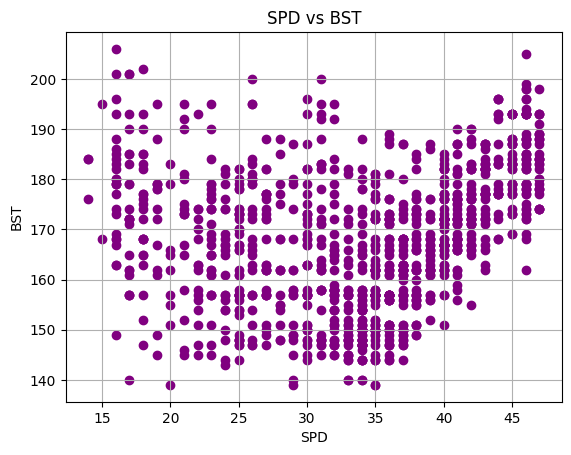

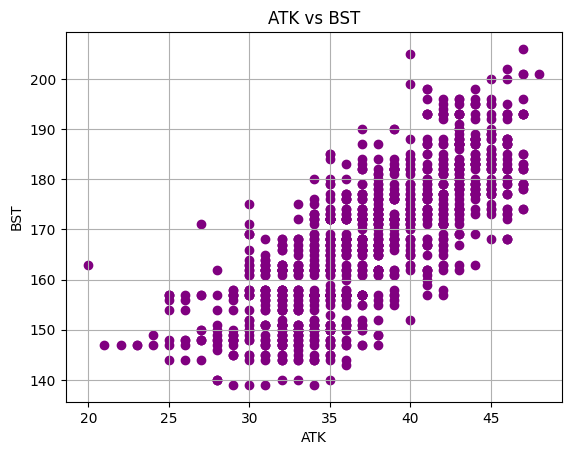

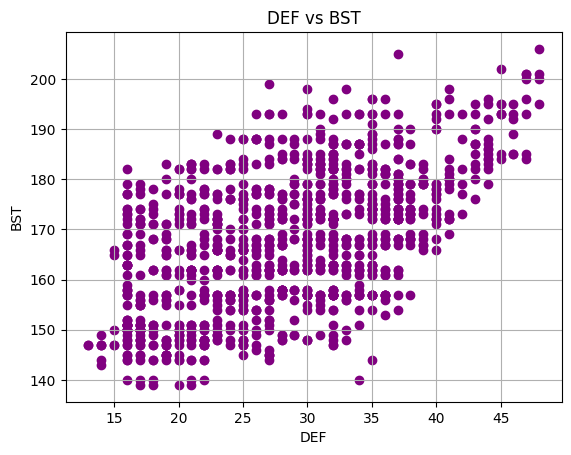

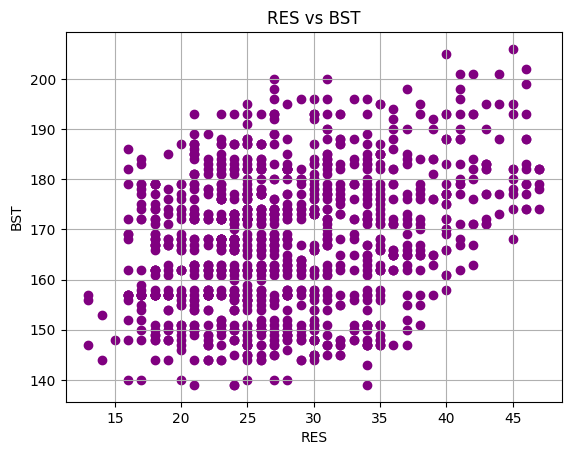

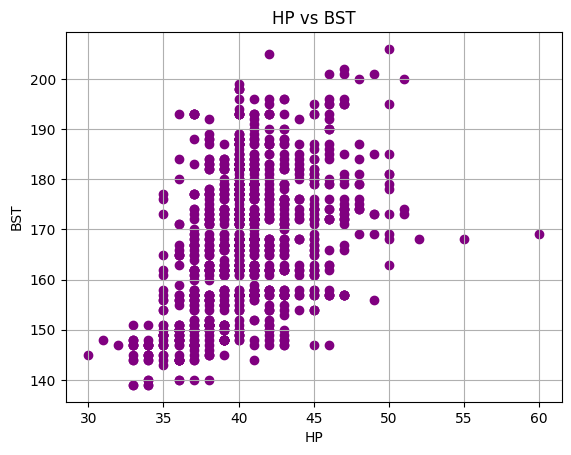

In [41]:
plt.scatter(df['SPD'], df['BST'], color='purple')
plt.title('SPD vs BST')
plt.xlabel('SPD')
plt.ylabel('BST')
plt.grid(True)
plt.show()

plt.scatter(df['ATK'], df['BST'], color='purple')
plt.title('ATK vs BST')
plt.xlabel('ATK')
plt.ylabel('BST')
plt.grid(True)
plt.show()

plt.scatter(df['DEF'], df['BST'], color='purple')
plt.title('DEF vs BST')
plt.xlabel('DEF')
plt.ylabel('BST')
plt.grid(True)
plt.show()

plt.scatter(df['RES'], df['BST'], color='purple')
plt.title('RES vs BST')
plt.xlabel('RES')
plt.ylabel('BST')
plt.grid(True)
plt.show()

plt.scatter(df['HP'], df['BST'], color='purple')
plt.title('HP vs BST')
plt.xlabel('HP')
plt.ylabel('BST')
plt.grid(True)
plt.show()

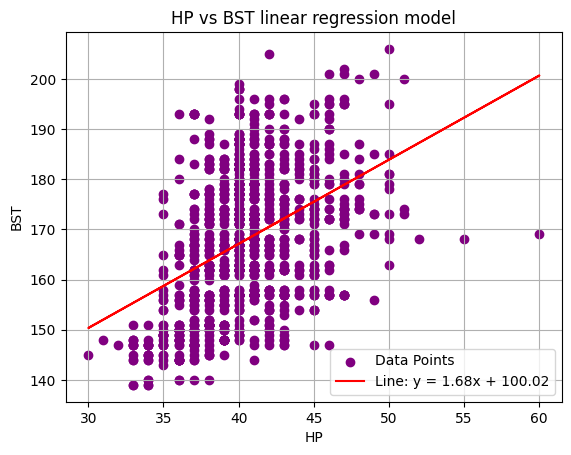

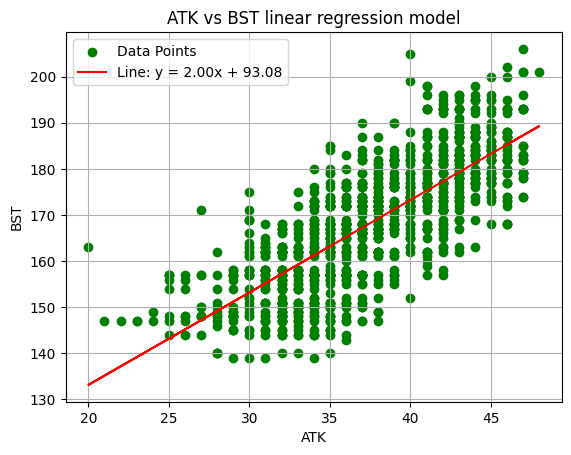

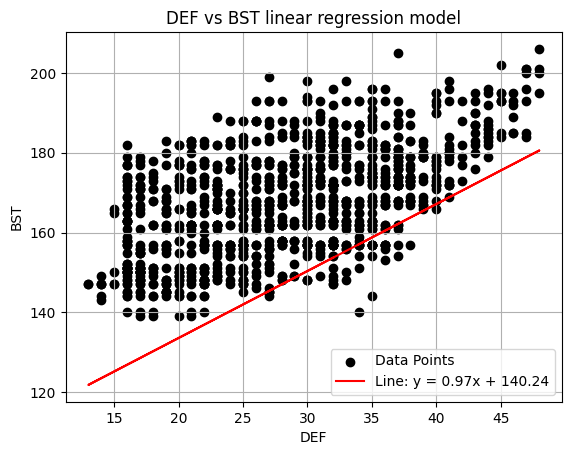

In [47]:
x = df['HP']
a = df['ATK']
d = df['DEF']
y = df['BST']

m, b = np.polyfit(x, y, 1)

plt.scatter(df['HP'], df['BST'], color='purple', label = 'Data Points')
plt.plot(x, m*x + b, color='red', label=f'Line: y = {m:.2f}x + {b:.2f}')
plt.title('HP vs BST linear regression model')
plt.xlabel('HP')
plt.ylabel('BST')
plt.legend()
plt.grid(True)
plt.show()

n, c = np.polyfit(a, y, 1)

plt.scatter(df['ATK'], df['BST'], color='green', label = 'Data Points')
plt.plot(a, n*a + c, color='red', label=f'Line: y = {n:.2f}x + {c:.2f}')
plt.title('ATK vs BST linear regression model')
plt.xlabel('ATK')
plt.ylabel('BST')
plt.legend()
plt.grid(True)
plt.show()

o, e = np.polyfit(d, y, 1)

plt.scatter(df['DEF'], df['BST'], color='black', label = 'Data Points')
plt.plot(d, m*d + b, color='red', label=f'Line: y = {o:.2f}x + {e:.2f}')
plt.title('DEF vs BST linear regression model')
plt.xlabel('DEF')
plt.ylabel('BST')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
y_pred = m * x + b

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R² (HP vs BST): {r_squared:.4f}")

a = df['ATK']
n, c = np.polyfit(a, y, 1)
y_pred_atk = n * a + c
r2_atk = 1 - np.sum((y - y_pred_atk) ** 2) / np.sum((y - np.mean(y)) ** 2)
print(f"R² (ATK vs BST): {r2_atk:.4f}")

d = df['DEF']
o, e = np.polyfit(d, y, 1)
y_pred_def = o * d + e
r2_def = 1 - np.sum((y - y_pred_def) ** 2) / np.sum((y - np.mean(y)) ** 2)
print(f"R² (DEF vs BST): {r2_def:.4f}")

R² (HP vs BST): 0.1770
R² (ATK vs BST): 0.5867
R² (DEF vs BST): 0.3113


<Axes: >

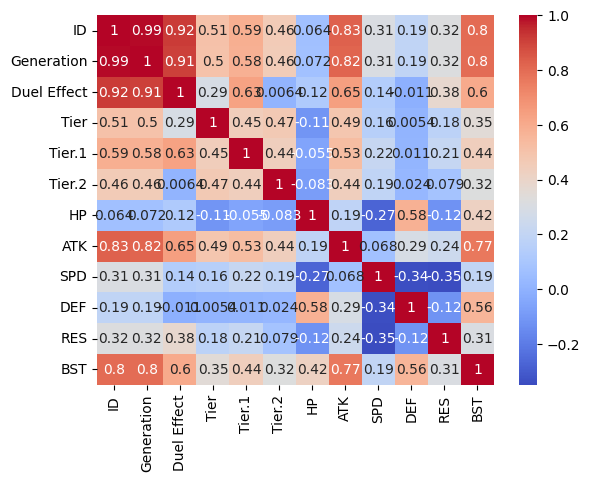

In [53]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

uhh finding out which non-armor units without prfs have the best bst

In [75]:
brokedf = df.query("Weapon not in ['PRF', 'Arcane'] and `Movement Type` != 'Armor'")

brokedf.nlargest(10, "BST")

,ID,Unit Name,Character,Backpack,Unit Obtained,Special Type,Theme,Rarity,Release Date,Refine Date,...,Tier.1,C,Tier.2,X,HP,ATK,SPD,DEF,RES,BST
1097,1098,Bridal Nel,Nel,NaN,Seasonal,NaN,Bridal,4★ Focus,2024-05-20,NaN,...,3.0,NaN,NaN,NaN,40,42,46,30,36,194
995,996,Wind Fugo,Fugo,NaN,Tempest Trial,NaN,Cultural,Grail,2023-09-07,NaN,...,NaN,Threat. Atk/Def,3.0,NaN,42,46,30,45,30,193
1019,1020,Ninja Saizo,Saizo,NaN,Tempest Trial,NaN,Ninja,Grail,2023-11-07,NaN,...,NaN,Def Smoke,3.0,NaN,37,41,45,45,25,193
1031,1032,Inigo,Inigo,NaN,Normal Pool,NaN,NaN,3★/4★,2023-12-08,NaN,...,3.0,NaN,NaN,NaN,40,44,45,34,30,193
1043,1044,New Year's Kana (M),Kana (M),NaN,Seasonal,NaN,New Year's,4★ Focus,2023-12-31,NaN,...,3.0,NaN,NaN,NaN,37,42,46,28,40,193
1044,1045,New Year's Kana (F),Kana (F),NaN,Tempest Trial,NaN,New Year's,Grail,2023-12-31,NaN,...,3.0,Drive Res,3.0,NaN,37,43,45,27,41,193
1054,1055,Nabata Hawkeye,Hawkeye,NaN,Tempest Trial,NaN,Desert,Grail,2024-01-20,NaN,...,NaN,Panic Ploy,3.0,NaN,45,47,22,41,38,193
1105,1106,Jarod,Jarod,NaN,Grand Hero Battle,NaN,NaN,Grail,2024-06-07,NaN,...,NaN,Pulse Smoke,3.0,NaN,42,46,44,34,27,193
971,972,Summer Donnel,Donnel,NaN,Tempest Trial,NaN,Summer,Grail,2023-07-07,NaN,...,3.0,NaN,NaN,NaN,46,45,31,40,30,192
977,978,Lapis,Lapis,NaN,Normal Pool,NaN,NaN,3★/4★,2023-07-18,NaN,...,NaN,Spd/Def Oath,3.0,NaN,41,41,45,29,32,188


who has the most alts

In [80]:
hodf = df['Character'].value_counts()

hodf.nlargest(20)

,count
Character,
Camilla,9
Chrom,8
Corrin (F),8
Lyn,8
Robin (M),8
Ike,7
Ephraim,7
Micaiah,7
Edelgard,7
